In [39]:
#Time Series Analysis on Stock Market Using Deep Learning

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model, save_model
from keras.layers import Dense, Lambda, Activation
from keras.layers import Embedding, Input, Dense, Flatten
from keras.optimizers import Adagrad, Adam, SGD, RMSprop
from keras.regularizers import l2
import keras.regularizers



In [41]:
google_stock = pd.read_csv("GOOGL.csv")
print(google_stock.head())
print(google_stock.info())


google_stock["Month"] = pd.to_datetime(google_stock["Date"]).dt.month
google_stock["Year"] = pd.to_datetime(google_stock["Date"]).dt.year
print(google_stock.head())
print("number of null values in the dataset",google_stock.isna().sum())
google_stock.describe()

         Date       Open       High        Low      Close  Adj Close  \
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219   
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209   
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753   
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488   
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   

     Volume  Month  Year  
0  44659096      8  2004  
1  22834343      8  2004  
2  18256126      8  2004  
3  15247337      8  2004  
4   9188602      8  2004  
number of null values in the dataset Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Month        0
Year         0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03,4431.000000,4431.000000
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06,6.566915,2012.926653
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06,3.455225,5.094350
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05,1.000000,2004.000000
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06,4.000000,2009.000000
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06,7.000000,2013.000000
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06,10.000000,2017.000000
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07,12.000000,2022.000000


In [113]:
def plot_timeseries (stock,stock_name,x, y):
  plt.figure(figsize=(14,6))
  sns.set_style("ticks")
  sns.lineplot(data=stock,x=x,y=y,color='firebrick')
  plt.title("The Stock Price of {} at {}".format(stock_name,y),size='x-large',color='blue')


In [43]:
import yfinance as yf
import seaborn as sns;sns.set()

In [44]:
start_date = "2013-01-01"
end_date = "2023-01-01"
amazon_stock = yf.download(tickers = "AMZN",start = start_date, end = end_date)


[*********************100%%**********************]  1 of 1 completed


In [45]:
amazon_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,73.823536,74.661898,72.881357,73.780049,73.780049,8.025620e+07
std,53.345656,53.998763,52.614135,53.289558,53.289558,4.230300e+07
min,12.447000,12.646500,12.287500,12.411500,12.411500,1.762600e+07
25%,21.978876,22.239375,21.789124,21.978374,21.978374,5.363918e+07
50%,59.936501,60.270750,59.420500,59.735750,59.735750,6.862200e+07
75%,107.947500,110.125498,106.283127,107.755125,107.755125,9.298800e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [46]:
amazon_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


In [47]:
amazon_stock.reset_index(inplace=True) #reset index as date was used as an index for the dataframe
amazon_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
1,2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2,2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
3,2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
4,2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


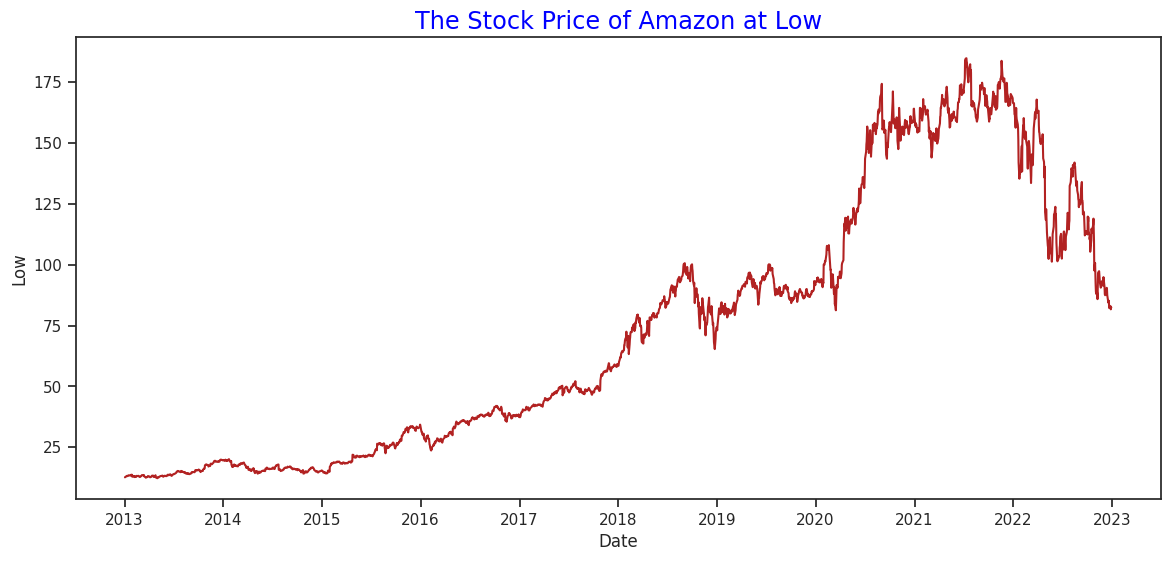

In [48]:
plot_timeseries(amazon_stock,"Amazon",pd.to_datetime(amazon_stock["Date"]),"Low")

In [49]:
# split train and test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
print("length of the data",len(amazon_stock))
length_train_data = int((75 * (len(amazon_stock)) ) /100)
length_test_data = len(amazon_stock) - length_train_data
print("train data {} and test data {} ".format(length_train_data,length_test_data))
train_data = amazon_stock.iloc[:length_train_data]
test_data = amazon_stock.iloc[length_train_data:]

#normalize the data for train and test

scaler = MinMaxScaler(feature_range=(0,1)).fit(train_data.iloc[:,1:]) #feature range (min and max value of the stock)
train_data.iloc[:,1:]= scaler.transform(train_data.iloc[:,1:])
test_data.iloc[:,1:]= scaler.transform(test_data.iloc[:,1:])
print(train_data.describe(),train_data.shape)
# print(train_data.head())
# print(test_data.head())


length of the data 2518
train data 1888 and test data 630 
              Open         High          Low        Close    Adj Close  \
count  1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean      0.285975     0.276126     0.285564     0.275467     0.275467   
std       0.256382     0.248317     0.255744     0.246832     0.246832   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.047780     0.045436     0.047877     0.045958     0.045958   
50%       0.204497     0.196166     0.205466     0.197284     0.197284   
75%       0.549859     0.534481     0.546838     0.529097     0.529097   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Volume  
count  1888.000000  
mean      0.138937  
std       0.098737  
min       0.000000  
25%       0.077398  
50%       0.111988  
75%       0.167615  
max       1.000000   (1888, 7)


<ipython-input-49-c92bae154a4d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.iloc[:,1:]= scaler.transform(train_data.iloc[:,1:])
<ipython-input-49-c92bae154a4d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.iloc[:,1:]= scaler.transform(test_data.iloc[:,1:])


In [13]:
#data has seasonal pattern thereform LSTM and predict open price for amazon stock from jan 2023 to jan 2024
#LSTM takes input in the form[num_sample = 100(number of comapnies), timesteps = 30(past 30 days), features = 4 (open, high, low)]
look_back = 30
def convert_data(data):
  lookback = look_back #number of past time steps ie the input data
  future_time_step = 1
  n_features = data.shape[1]
  input_seq =[]
  output_seq = []

  for i in range(len(data)-lookback-future_time_step+1):
    input = data.iloc[i:(i+lookback),[2,3,4,5,6]] #every 30 values of the past predicts the next two values
    output = data.iloc[(i+lookback):(i+lookback+future_time_step),[1]] # 2 values to be predicted
    input_seq.append(input.values)
    output_seq.append(output.values)
  print("length of input sequence {} and 0th element {} ".format(len(input_seq),len(input_seq[0]))) # 725 and 30
  print("length of output sequence {} and 0th element {}".format(len(output_seq),len(output_seq[0]))) # 725 and 2
  return input_seq,output_seq

input_seq , output_seq = convert_data(train_data)



length of input sequence 1858 and 0th element 30 
length of output sequence 1858 and 0th element 1


In [50]:
# print("output_seq",output_seq[0])
# print("input_seq",input_seq[0])
input_seq = np.array(input_seq)#(725, 30, 5)
output_seq = np.array(output_seq) #(725, 2, 1)
print("input_seq size",input_seq.shape)
print("output_seq size",output_seq.shape)



input_seq size (1858, 30, 5)
output_seq size (1858, 1, 1)


In [87]:
# Building a GRU model
from keras.callbacks import EarlyStopping

def create_GRU(num_neurons):
  model = keras.Sequential()
  model.add(tf.keras.layers.GRU(units = num_neurons,input_shape = [input_seq.shape[1],input_seq.shape[2]],return_sequences = True))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.GRU(units = int(num_neurons),return_sequences = True))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.GRU(units = int(num_neurons),return_sequences = True))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(Dense(units = 1))

  #introducing momentum for faster convergence

  learning_rate = 0.001
  momentum = 0.9
  weight_decay = 1e-7

  # initialize the Adam optimizer with momentum
  SGD_optimizer = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)

  # compile model
  model.compile(optimizer=SGD_optimizer, loss='mse')
  print("Summary of GRU model", model.summary())
  return model

GRU_model = create_GRU(64)


early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

train_gru_model = GRU_model.fit(input_seq, #input
                         output_seq, # labels
                         batch_size=30, epochs=25, verbose=1, shuffle=False, callbacks = [early_stop])



Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_81 (GRU)                (None, 30, 64)            13632     
                                                                 
 dropout_78 (Dropout)        (None, 30, 64)            0         
                                                                 
 gru_82 (GRU)                (None, 30, 64)            24960     
                                                                 
 dropout_79 (Dropout)        (None, 30, 64)            0         
                                                                 
 gru_83 (GRU)                (None, 30, 64)            24960     
                                                                 
 dropout_80 (Dropout)        (None, 30, 64)            0         
                                                                 
 dense_24 (Dense)            (None, 30, 1)           

In [51]:
#Convert the test data into required format

input_test_seq,output_test_seq = convert_data(test_data)
input_test_seq = np.array(input_test_seq)
output_test_seq = np.array(output_test_seq)
print("shape of test dataset",input_test_seq.shape,output_test_seq.shape)


# Loss on test dataset
test_loss = GRU_model.evaluate(input_test_seq, output_test_seq)

length of input sequence 600 and 0th element 30 
length of output sequence 600 and 0th element 1
shape of test dataset (600, 30, 5) (600, 1, 1)


NameError: name 'GRU_model' is not defined

In [159]:
start_date = "2013-01-01"
end_date = "2023-01-01"
google_stock = yf.download(tickers = "GOOGL",start = start_date, end = end_date)
google_stock.reset_index(inplace=True)
print(google_stock.head())
print(google_stock.info())
print(google_stock.describe())

[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close     Volume
0 2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348  101550348
1 2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   92635272
2 2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718  110429460
3 2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   66161772
4 2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   66976956
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2518 non-null   datetime64[ns]
 1   Open       2518 non-null   float64       
 2   High       2518 non-null   float64       
 3   Low        2518 non-null   float64       
 4   Close      2518 non-null   float64       
 5   Adj Close  2518 non-null   float64       
 6   Volume     2518 non-null   int64       

number of null values in the dataset Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


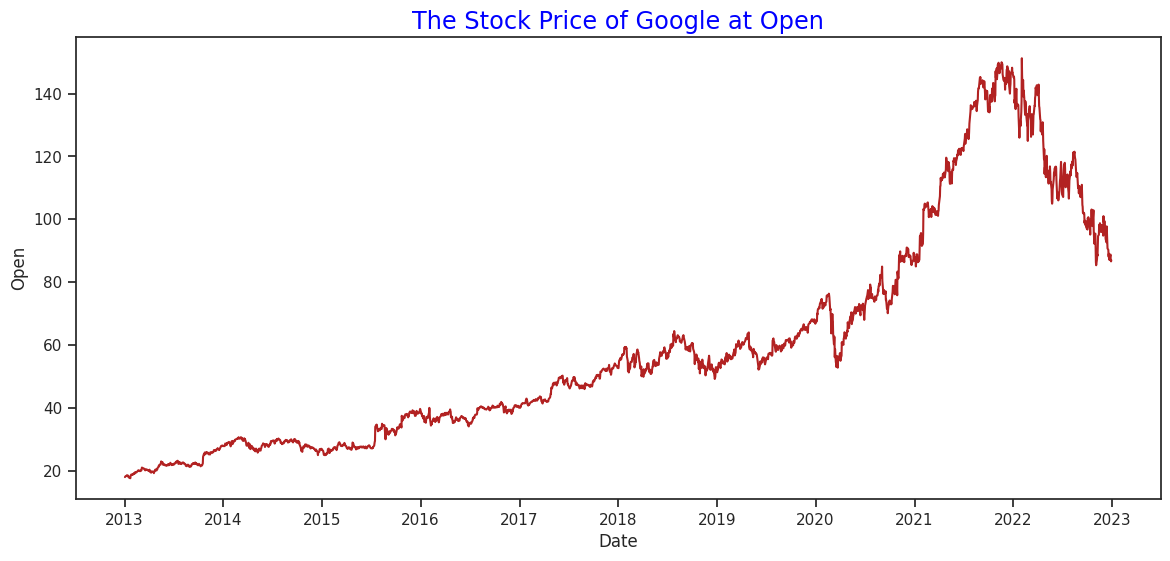

In [160]:
print("number of null values in the dataset",google_stock.isna().sum())
google_stock.describe()
plot_timeseries(google_stock,"Google",pd.to_datetime(google_stock["Date"]),"Open")

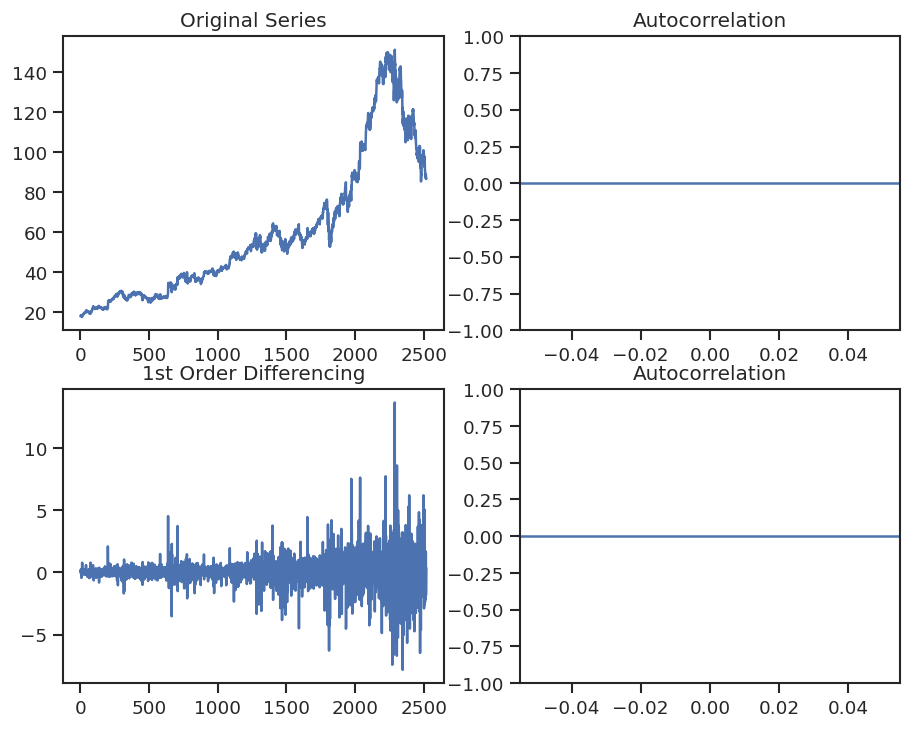

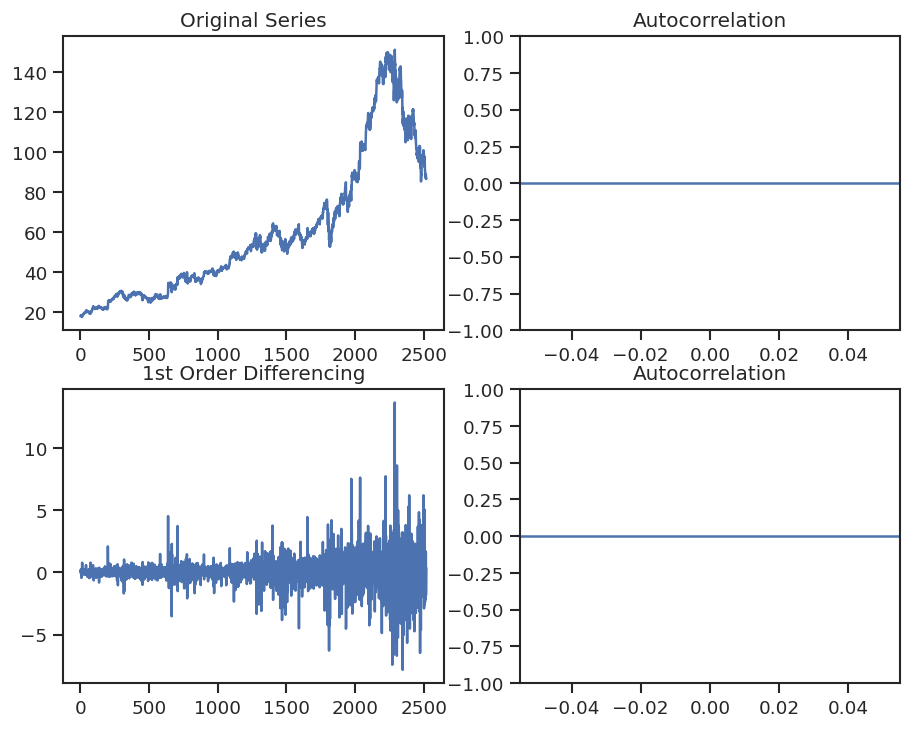

In [166]:
import matplotlib.pyplot as plt1

plt1.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt1.subplots(2,2)
axes[0,0].plot(google_stock["Open"])
axes[0,0].set_title('Original Series')
plot_acf(google_Open_original, ax=axes[0,1])

# 1st Differencing
google_diff = google_stock["Open"].diff().dropna()
axes[1, 0].plot(google_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(google_Open, ax=axes[1, 1])


In [167]:
#Train ARIMA model on google data
#check if the series is stationary - augmented dickey fuller test
# find the value of p = AR model
# find the value of q = MA model
# find the value of d = make the model stationary

#first order differencing to make the series stationary :

google_stock.iloc[:,1:] = google_stock.iloc[:,1:].diff()
print(google_stock.head())

#only working with google close price

google_Open = google_stock["Open"]
train_data_len = int((75 * (len(google_Open)) ) /100)
test_data_len = len(google_Open) - train_data_len
print("train data {} and test data {} ".format(train_data_len,test_data_len))
google_train_data = google_Open.iloc[:train_data_len]
google_test_data = google_Open.iloc[train_data_len:]


print(google_test_data.head())

        Date      Open      High       Low     Close  Adj Close      Volume
0 2013-01-02       NaN       NaN       NaN       NaN        NaN         NaN
1 2013-01-03  0.137888  0.123373  0.104353  0.010511   0.010511  -8915076.0
2 2013-01-04  0.110361  0.238739  0.174175  0.357859   0.357859  17794188.0
3 2013-01-07  0.152903 -0.052303  0.072573 -0.080582  -0.080582 -44267688.0
4 2013-01-08  0.002251 -0.077076 -0.153904 -0.036285  -0.036285    815184.0
train data 1888 and test data 630 
1888    1.633499
1889    1.815498
1890    0.399002
1891    0.233498
1892    0.456497
Name: Open, dtype: float64


In [168]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
google_train_data = google_train_data.dropna()
result = adfuller(google_train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) #p value = 0, reject the null hypothesis that the data is non stationary


ADF Statistic: -9.725541
p-value: 0.000000


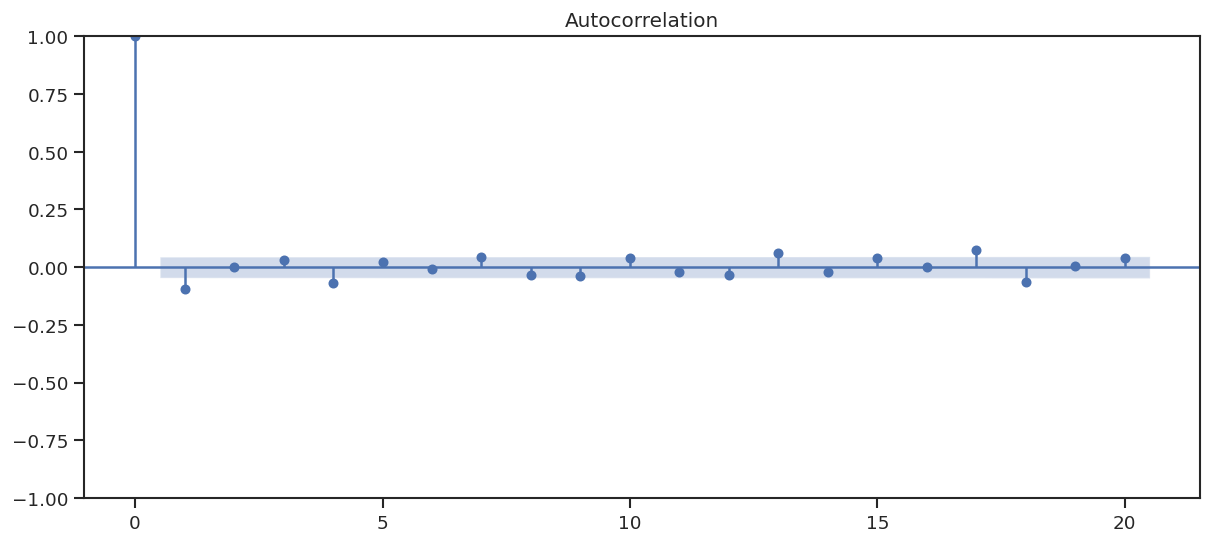

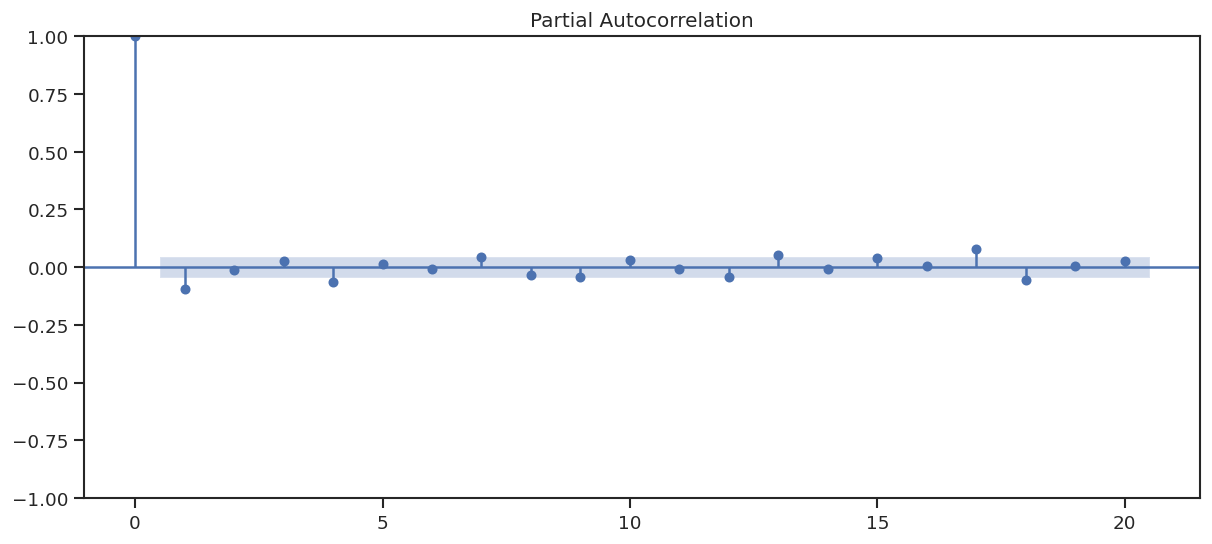

In [169]:
#plotting the ACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,5))
plot_acf(google_train_data, lags=20, ax=ax)
plt.show()

#plot the PACF plot

fig2 , ax2 = plt.subplots(figsize = (12,5))
plot_pacf(google_train_data,lags = 20,ax = ax2)
plt.show()

# we can say p =4 and q =4

In [171]:
#Plot ARIMA model

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(google_train_data, order = (2,1,2))
ARIMA_model= model.fit()
ARIMA_model.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1887
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2116.720
Date:                Tue, 12 Mar 2024   AIC                           4243.439
Time:                        05:53:43   BIC                           4271.151
Sample:                             0   HQIC                          4253.645
                               - 1887                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0312      0.029    -35.139      0.000      -1.089      -0.974
ar.L2         -0.1156      0.013     -9.214      0.000      -0.140      -0.091
ma.L1         -0.0591      0.290     -0.204      0.838      -0.627       0.509
ma.L2         -0.9409      0.267     -3.518      0.000      -1.465      -0.417
sigma2         0.5503      0.157      3.502      0.000       0.242       0.858
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8550.84
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              11.21   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
# Generate predictions

forecast = ARIMA_model.get_prediction(steps = len(google_test_data))
print(forecast.summary_frame())
yhat_result = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)
print("confidence internal for p and q ",yhat_conf_int)

Open      mean      mean_se  mean_ci_lower  mean_ci_upper
1     0.000000  1000.000611   -1959.965182    1959.965182
2     0.137888     1.105565      -2.028979       2.304755
3     0.125067     0.934581      -1.706679       1.956812
4     0.132014     0.863338      -1.560098       1.824126
5     0.110165     0.838131      -1.532541       1.752870
...        ...          ...            ...            ...
1883  0.019022     0.741993      -1.435258       1.473301
1884  0.123644     0.741993      -1.330636       1.577923
1885  0.123687     0.741993      -1.330592       1.577966
1886  0.260935     0.741993      -1.193343       1.715214
1887  0.065323     0.741993      -1.388956       1.519602

[1887 rows x 4 columns]
confidence internal for p and q         lower Open   upper Open
1    -1959.965182  1959.965182
2       -2.028979     2.304755
3       -1.706679     1.956812
4       -1.560098     1.824126
5       -1.532541     1.752870
...           ...          ...
1883    -1.435258     1.47330

1       0.000000
2       0.137888
3       0.125067
4       0.132014
5       0.110165
          ...   
1883    0.019022
1884    0.123644
1885    0.123687
1886    0.260935
1887    0.065323
Name: predicted_mean, Length: 1887, dtype: float64


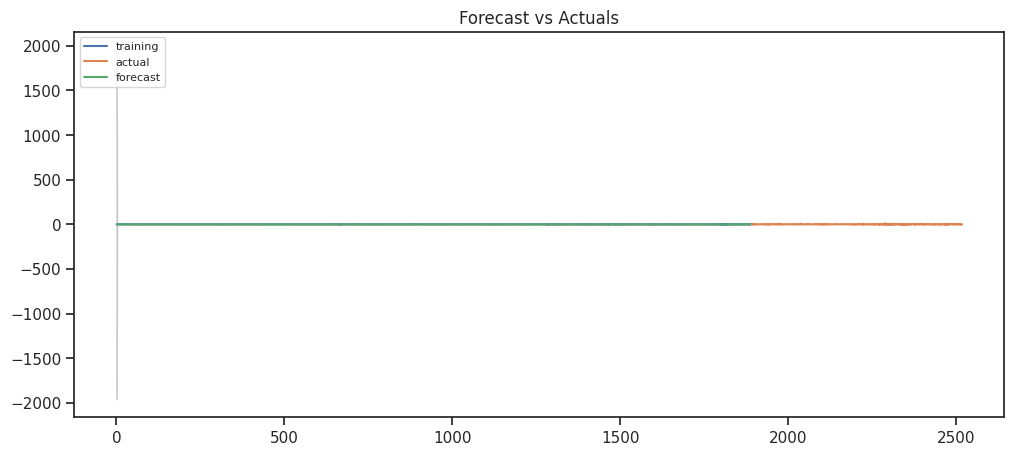

In [173]:
# Generate series with the forecast to plot the data
result = pd.Series(yhat_result)
lower_series = pd.Series(yhat_conf_int.iloc[:,0])
upper_series = pd.Series(yhat_conf_int.iloc[:,1])
# Plot the forecasts
print(result)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(google_train_data, label='training')
plt.plot(google_test_data, label='actual')
plt.plot(result, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.2)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

